In [1]:
import gym 
import numpy as np
from custom_envs.gridworlds import WindyGridworldEnv, SimpleGridworldEnv

from function_approximators.function_approximators import NeuralNetwork, LinearModel, DecisionTree, RandomForest, ExtraTrees, GradientBoostingTrees, SupportVectorRegressor
from utils.train_utils import train

from agents.agents import DQNAgent, LinearAgent, NonParametricAgent


In [2]:
function_approximators = [NeuralNetwork, LinearModel, DecisionTree, RandomForest, ExtraTrees, GradientBoostingTrees, SupportVectorRegressor]
agents = [DQNAgent, LinearAgent, *[NonParametricAgent]*5]

RENDER = False
env = gym.make("CartPole-v1")
# env = gym.make("Acrobot-v1")
# env = gym.make("MountainCar-v0")
# env = WindyGridworldEnv()
# env = gym.make("LunarLander-v2")
# env = SimpleGridworldEnv()

In [8]:
# DQN Config
CONFIG_DQN = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "learning_rate": 0.0008,
    "hidden_size": (32,32),
    "target_update_freq": 200,
    "batch_size": 32,
    "gamma": 0.99,
    "buffer_capacity": int(1e7),
    "plot_loss": False,
    "epsilon": 1,
    "max_deduct": 0.97,
    "decay": 0.2,
    "lr_step_size": 1000,
    "lr_gamma": 0.98,
    "max_steps": 200,
    "non_param": False,
}

# Linear Config
CONFIG_LINEAR = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "learning_rate": 0.02,
    "target_update_freq": 50,
    "batch_size": 32,
    "gamma": 0.99,
    "buffer_capacity": int(1e7),
    "plot_loss": False,
    "epsilon": 1,
    "max_steps": 200,
    "poly_degree": 2,
    "max_deduct": 0.97,
    "decay": 0.5,
    "lr_step_size": 1000,
    "lr_gamma": 0.99,
    "non_param": False,
}

# Decision Tree Config
CONFIG_DT = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e7),
    "epsilon": 1,
    "max_deduct": 0.97,
    "decay": 0.5,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"max_depth": 12, "min_samples_split": 20, "min_samples_leaf": 5},
}

# Random Forest Config
CONFIG_RF = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e5),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"n_estimators": 10,"max_depth": 10, "min_samples_split": 10, "min_samples_leaf": 10},
}

# Extra Trees Config
CONFIG_ET = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e5),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"n_estimators": 10,"max_depth": 10, "min_samples_split": 10, "min_samples_leaf": 10},
}

# Gradient Boosting Trees Config
CONFIG_RF = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e5),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"loss":"ls","learning_rate":0.1, "n_estimators": 10,"max_depth": 10, "min_samples_split": 10, "min_samples_leaf": 10},
}

# Support Vector Regressor Config
CONFIG_SVR = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 3,
    "model_save_freq": 1000,
    "model_save_capacity": 10,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e5),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"kernel":"rbf", "degree": 2, "C": 1},
}


In [9]:

returns_dqn = []
n_seeds=10

j=0
for i in range(n_seeds):
    print(f"\n Run: {i+1} \n")
    r, _ = train(env, 
            CONFIG_DQN, 
            fa=function_approximators[j], 
            agent = agents[j], 
            render=RENDER)
    env.close()
    returns_dqn.append(r)

  1%|          | 106/20000 [00:00<00:19, 1001.28it/s]
 Run: 1 

q_loss: 1.1022272109985352
  5%|▌         | 1089/20000 [00:01<00:25, 753.66it/s]Evaluation at timestep 1018 returned a mean returns of 9.100000000000001
Epsilon = 0.757985
Learning rate = 0.0006
q_loss: 1.2361114025115967
 10%|█         | 2076/20000 [00:02<00:30, 593.92it/s]Evaluation at timestep 2017 returned a mean returns of 100.7
Epsilon = 0.5288225
Learning rate = 0.0005939999999999999
q_loss: 1.057196021080017
 15%|█▌        | 3093/20000 [00:04<00:21, 798.61it/s]Evaluation at timestep 3093 returned a mean returns of 200.0
Epsilon = 0.2984475000000001
Learning rate = 0.0005821794
 20%|██        | 4093/20000 [00:05<00:21, 734.93it/s]Evaluation at timestep 4093 returned a mean returns of 200.0
Epsilon = 0.05594750000000004
Learning rate = 0.000576357606
 25%|██▌       | 5093/20000 [00:07<00:21, 686.45it/s]Evaluation at timestep 5093 returned a mean returns of 200.0
Epsilon = 0.030000000000000027
Learning rate = 0.000570

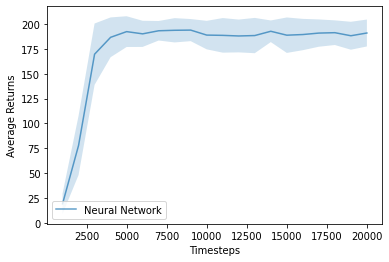

In [10]:
from utils.plot_utils import plot_returns

means = [np.mean(returns_dqn,axis=0)]
stds = [np.std(returns_dqn,axis=0)]
legends = ["Neural Network"]

plot_returns(values=means, stds=stds, xlabel="Timesteps", ylabel="Average Returns", legend_names=legends, eval_freq=1000)

In [19]:
for i in range(len(means)):
    with open('cartpole.csv', 'ab') as f:
        np.savetext(f, legends[i])
        np.savetxt(f, means[i], delimiter=',')
        np.savetxt(f, stds[i], delimiter=',')
        

TypeError: a bytes-like object is required, not 'str'